In [1]:
import numpy as np      ### importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
import cv2             ### import opencv 
import os              ### changing the directory to the images folder
os.chdir(r'C:\Users\guthu\Desktop\sample projects\New folder')

In [6]:
import glob           ### collecting all image directories using glob
images = glob.glob(os.path.join(r'C:\Users\guthu\Desktop\sample projects\New folder','**/*.jpg'))
print(len(images))

24


In [4]:
def get_img_pos(number,img):  ### This function outputs the respective coordinates of an image when given an pixel number as input
    size = img.shape
    y = int(number/size[0])
    x = int(number-(y*size[0]))
    return[y,x]

In [5]:
def ratio(x):              ### this function outputs a particular ratio which can used as threshold
  mean = np.mean(x)
  avg = max(x)/2+min(x)/2
  std = np.std(x)
  Q1 = np.quantile(x, 0.25) 
  Q3 = np.quantile(x,0.75)
  IQR = Q3-Q1
  Min = Q1-(1.5*IQR)
  Max = Q3+(1.5*IQR)
  r = (abs(max(x)-Max)+abs(Min-min(x)))/(2*IQR)
  return r

1.3571428571428572


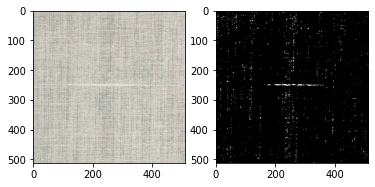

1.75


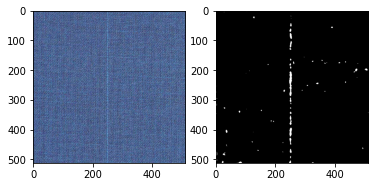

1.1666666666666667


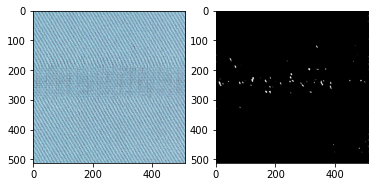

6.375


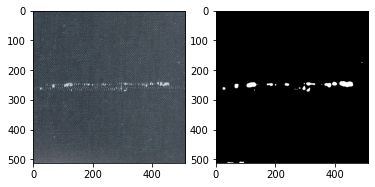

0.2682926829268293


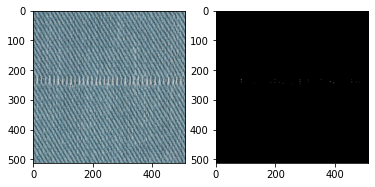

5.5


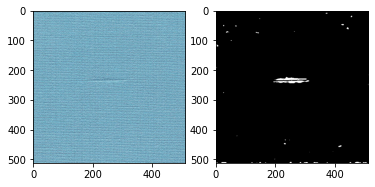

3.9166666666666665


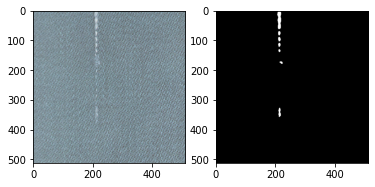

21.166666666666668


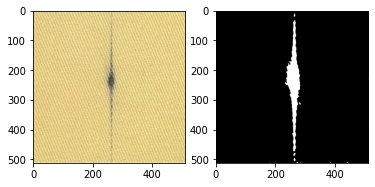

3.1875


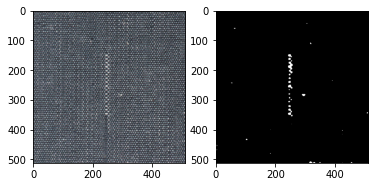

0.4857142857142857


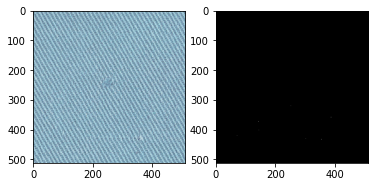

0.24193548387096775


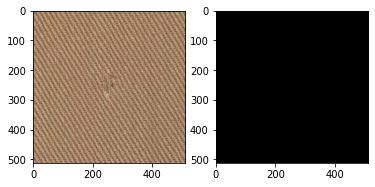

3.5714285714285716


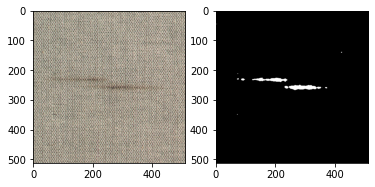

4.125


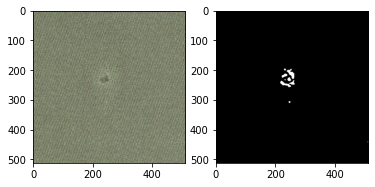

5.0


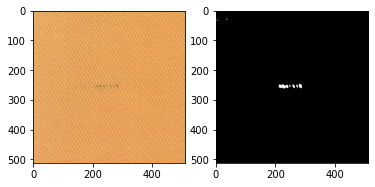

7.111111111111111


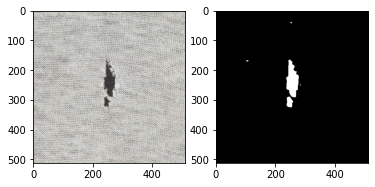

5.222222222222222


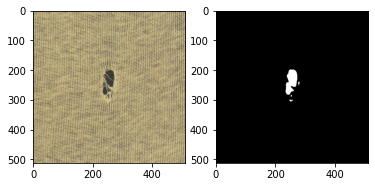

2.857142857142857


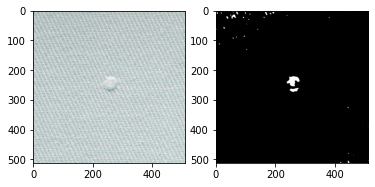

3.8333333333333335


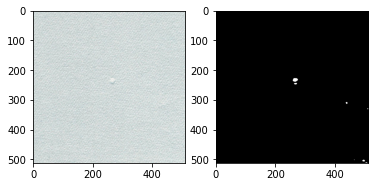

1.5555555555555556


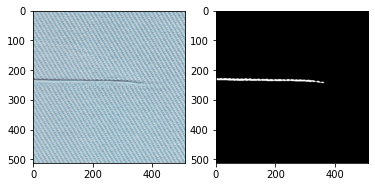

0.19230769230769232


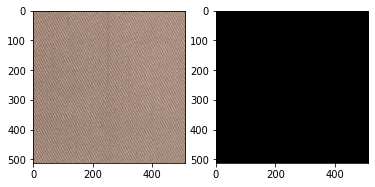

2.0625


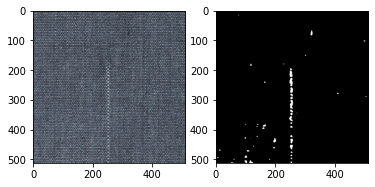

1.0561797752808988


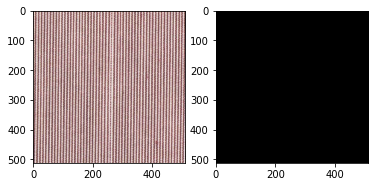

0.1794871794871795


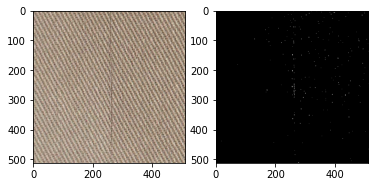

2.25


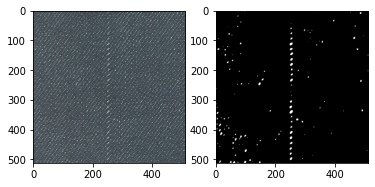

In [6]:
for image in images:                               
  img = cv2.imread(image)                    ### reads the image
  rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (51,51),3)     ### apply gaussian blur to reduce the noise in the image
  data = blur.flatten()                        ### flatten the blurred image 
  L=[]
  for i in range(len(data)):
      L.append(int(i))                         ### created a column of series of indexes
  x = pd.DataFrame(data=L)                     ### created a dataframe x
  x['1'] = data                                ### introduced a new column to fit the flattened blur image
  r = ratio(x['1'])                            
  Q1 = np.quantile(x['1'], 0.25)               ### calculate the first quantile
  Q3 = np.quantile(x['1'],0.75)                ### calculate the third quantile
  IQR = Q3-Q1                                  ### difference between the first and third quantile
  Min = Q1-(1.5*IQR)                           ### Minimum value to detect the outliers
  Max = Q3+(1.5*IQR)                           ### Maximum value to detect the outliers
  if 3.0>r>1.5:                                    ### If ratio is between 1.5 and 3 repeat the above process by changing the kernel size
    blur = cv2.GaussianBlur(gray, (51,51),3)   ### set the kernel size to 3
    data = blur.flatten()
    x['1'] = data    
    ratio(x['1'])
    Q1 = np.quantile(x['1'], 0.25) 
    Q3 = np.quantile(x['1'],0.75)
    IQR = Q3-Q1
    Min = Q1-(1.8*IQR)                         ### changed minimum value to detect outliers
    Max = Q3+(1.8*IQR)                         ### changed maximum value to detect outliers
  if r>3.0:
    blur = cv2.GaussianBlur(gray, (51,51),3)   ### If ratio is less than 3 repeat the above process by changing the kernel size
    data = blur.flatten()
    x['1'] = data    
    ratio(x['1'])
    Q1 = np.quantile(x['1'], 0.25) 
    Q3 = np.quantile(x['1'],0.75)
    IQR = Q3-Q1
    Min = Q1-(2.7*IQR)                           ### changed minimum value to detect the outliers
    Max = Q3+(2.7*IQR)                           ### changed maximum value to detect the outliers
  if 0<r<=0.5:
    blur = cv2.GaussianBlur(gray, (51,51),1)   ### If ratio is between 0 and 0.5 repeat the above process by changing the kernel size
    data = blur.flatten()
    x['1'] = data    
    ratio(x['1'])
    Q1 = np.quantile(x['1'], 0.25) 
    Q3 = np.quantile(x['1'],0.75)
    IQR = Q3-Q1
    Min = Q1-(1*IQR)
    Max = Q3+(1*IQR)
  if 0.5<r<=1.0:
    blur = cv2.GaussianBlur(gray, (51,51),3)   ### If ratio is between 0 and 0.5 repeat the above process by changing the kernel size
    data = blur.flatten()
    x['1'] = data    
    ratio(x['1'])
    Q1 = np.quantile(x['1'], 0.25) 
    Q3 = np.quantile(x['1'],0.75)
    IQR = Q3-Q1
    Min = Q1-(1.5*IQR)
    Max = Q3+(1.5*IQR)
  if 1.0<r<1.5:                               ### If ratio is between 0.5 and 1.5 repeat the above process by changing the kernel size
    blur = cv2.GaussianBlur(gray, (51,51),3)
    data = blur.flatten()
    x['1'] = data    
    ratio(x['1'])
    Q1 = np.quantile(x['1'], 0.25) 
    Q3 = np.quantile(x['1'],0.75)
    IQR = Q3-Q1
    Min = Q1-(1.7*IQR)
    Max = Q3+(1.7*IQR)    
  I = []                             ### created an empty list I for collecting outliers
  for i in range(len(x['1'])):
      if x['1'][i]>=int(Max):
          I.append(x[0][i])
  for i in range(len(x['1'])):
      if x['1'][i]<=int(Min):
          I.append(x[0][i])    
  mask = np.zeros(img.shape[:3],dtype='uint8')
  for i in range(len(I)):
      index = I[i]
      mask_pos = get_img_pos(index,img)
      mask[mask_pos[0],mask_pos[1]]=255      ### segment a mask by removing the outlier positions of the original image
  masked_img = cv2.bitwise_or(rgb,mask)
  print(ratio(x['1']))
  plt.subplot(1,2,1)
  plt.imshow(rgb) 
  plt.subplot(1,2,2)
  plt.imshow(mask)
  plt.show()